# Cálculo de mínimo analíticamente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sympy import symbols, diff
import sympy as sp

In [2]:
boston = load_boston() # cargo libreria boston
print(boston.DESCR)  # Veo la descripcion de los datos

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

En este caso vamos a predecir el valor (MEDV) a partir de el numero de habitaciones

In [3]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = np.array(df.RM) #feature cantidad de habitaciones promedio del barrio
Y = np.array(boston.target) #target valor promedio de las propiedades en ese barrio

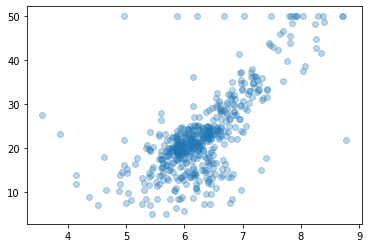

In [5]:
plt.scatter(X,Y, alpha = 0.3)
plt.show()

Formula para minimizar el error cuadratico medio: $W = (X^{T}X)^{-1}X^{T}Y$

Donde W es el peso que necesito sacar para tener:

Y = XW

In [6]:
#Añado columna de 1s a X para que contemple el termino independiente
X = np.array([np.ones(506), X]).T
X.shape


(506, 2)

In [9]:
W = np.linalg.inv(X.T @ X) @ X.T @ Y

In [10]:
W

array([-34.67062078,   9.10210898])

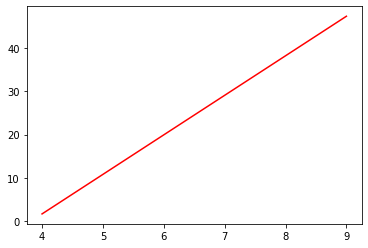

In [11]:
plt.plot([4,9], [W[0]+W[1]*4,W[0]+W[1]*9], c = "red")

In [ ]:
X.shape

(506, 2)

In [ ]:
Y.shape

(506,)

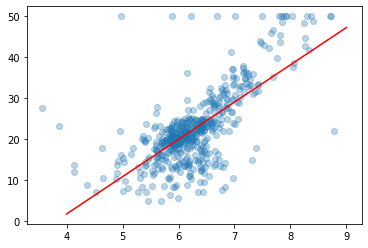

In [ ]:
plt.scatter(np.array(df.RM),Y, alpha = 0.3)
plt.plot([4,9], [W[0]+W[1]*4,W[0]+W[1]*9], c = "red")
plt.show()

# Implementación de optimización por descenso del gradiente



In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#Funcion a optimizar:
func = lambda th: np.sin(1/2 * th[0] ** 2 - 1/4 * th[1] ** 2 + 3) *np.cos(2 * th[0] + 1 - np.e ** th[1])

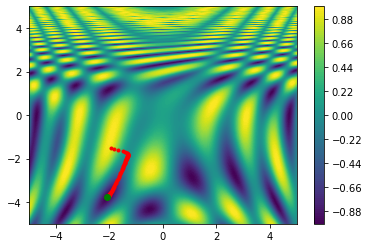

In [ ]:
#Genero la grafica para ver como se comporta la funcion

res = 1000
_X = np.linspace(-5,5,res)
_Y = np.linspace(-5,5,res)

_Z = np.zeros((res,res))
for i, x in enumerate(_X):
  for j, y in enumerate(_Y):
    _Z[j,i] = func([x,y])

plt.contourf(_X,_Y,_Z, 100)
plt.colorbar()

# genero dos numeros aleatorios entre -2 y 2 que representan los parametros iniciales
Theta = np.random.rand(2) * 4 -2
grad = np.zeros(2)

lr = 0.001
h = 0.01

for _ in range(10000):
  for it, th in enumerate(Theta):
    _T = np.copy(Theta)
    _T[it] = _T[it] + h
    deriv = (func(_T) - func(Theta)) / h
    grad[it] = deriv
  Theta = Theta - lr * grad

  if(_ % 100 == 0 ):
    plt.plot(Theta[0], Theta[1], ".", c = "red")


plt.plot(Theta[0], Theta[1], "o", c = "green")

plt.show()